In [183]:
from collections import OrderedDict
from bs4 import BeautifulSoup
from kmodes import kmodes
from IPython.display import Image
from itertools import cycle
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords # Import the stop word list
from scipy import interp
from scipy.spatial.distance import cdist
from sklearn import cross_validation, datasets, linear_model, metrics, svm, datasets, tree
from sklearn.cluster import KMeans, MeanShift
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc, silhouette_samples, silhouette_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from statistics import mode, mean, median
import graphviz as gv
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pydotplus
import re

import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [131]:
df = pd.read_excel('student retention data-2.xls', sheet_name='retention_minogue')
df

,COHORT,ETERM,AGE,SEX,DPU_CUMGPA,HS_Type,HS_CGPA,EXT_SIZE,RHSRANK,EACTR,...,retention_3,graduate_4,graduate_5,graduate_6,afr_amer,asian,latino,white,other_race,unknown_race
0,2008,810,19.0,F,2.84,NaN,3.00,0.0,NaN,32.0,...,0,0,0,0,0,0,0,1,0,0
1,2007,785,18.0,F,3.94,Public,3.92,1177.0,2.0,20.0,...,1,1,1,1,0,0,1,0,0,0
2,2009,835,18.0,F,NaN,NaN,NaN,508.0,1.0,NaN,...,0,0,0,0,0,0,0,1,0,0
3,2007,785,21.0,F,2.81,Private,2.99,169.0,3.0,27.0,...,1,0,0,0,0,0,0,1,0,0
4,2007,785,18.0,M,3.13,Public,2.81,913.0,4.0,28.0,...,1,1,1,1,0,0,0,1,0,0
5,2007,785,21.0,F,2.93,Public,NaN,0.0,NaN,27.0,...,0,0,0,0,0,0,0,1,0,0
6,2007,785,22.0,M,2.84,NaN,NaN,NaN,NaN,23.0,...,1,0,0,0,0,0,0,0,0,1
7,2008,810,22.0,F,3.71,NaN,4.00,0.0,NaN,25.0,...,0,0,0,0,0,0,0,1,0,0
8,2007,785,19.0,F,2.28,Public,3.38,629.0,3.0,23.0,...,1,0,1,1,0,0,1,0,0,0
9,2008,810,19.0,M,3.50,Private,3.49,0.0,NaN,23.0,...,1,1,1,1,0,0,1,0,0,0


In [132]:
print(list(df))
for col in df:
    print("Column:", col, "; Unique Values: ",df[col].unique())

['COHORT', 'ETERM', 'AGE', 'SEX', 'DPU_CUMGPA', 'HS_Type', 'HS_CGPA', 'EXT_SIZE', 'RHSRANK', 'EACTR', 'EACTS', 'EACTE', 'EACTC', 'EACTV', 'EACTM', 'INTERNAT', 'FIRSTGN', 'PELL_ELIG', 'ACADGRP', 'Big_Shoulder', 'Catholic', 'CPS_HS', 'IB_SelfSelect', 'GPA_1STQ', 'YRGPA1', 'YRGPA2', 'YRGPA3', 'YRGPA4', 'YRGPA5', 'YRGPA6', 'YRGPA7', 'YRGPA8', 'yrgpa9', 'yrgpa10', 'yrgpa11', 'HRSYR1', 'HRSYR2', 'HRSYR3', 'HRSYR4', 'HRSYR5', 'HRSYR6', 'HRSYR7', 'HRSYR8', 'HRSYR9', 'HRSYR10', 'CUMHRYR1', 'CUMHRYR2', 'CUMHRYR3', 'CUMHRYR4', 'CUMHRYR5', 'CUMHRYR6', 'CUMHRYR7', 'CUMHRYR8', 'CUMHRYR9', 'CUMHRYR10', 'HOUR1', 'HOUR2', 'HOUR3', 'HOUR4', 'HOUR5', 'HOUR6', 'HOUR7', 'HOUR8', 'HOUR9', 'HOUR10', 'HOUR11', 'HOUR12', 'HOUR13', 'HOUR14', 'HOUR15', 'HOUR16', 'HOUR17', 'HOUR18', 'HOUR19', 'HOUR20', 'HOUR21', 'HOUR22', 'HOUR23', 'HOUR24', 'HOUR25', 'HOUR26', 'HOUR27', 'HOUR28', 'HOUR29', 'HOUR30', 'HOUR31', 'HOUR32', 'HOUR33', 'HOUR34', 'HOUR35', 'HOUR36', 'HOUR37', 'HOUR38', 'HOUR39', 'HOUR40', 'HOUR41', 'HOU

 310.   63.  213.5 239.5 109.  138.5 126.  306.5]
Column: CUMHRYR10 ; Unique Values:  [ 32.  256.   54.  162.  200.   16.  138.   40.  246.  188.  202.  190.
 206.  142.   28.  204.   48.  216.  224.  228.  192.  168.  196.   34.
 194.  144.  205.  210.  174.   44.   56.   92.  226.   52.  212.  250.
 240.  220.  198.  233.  184.  187.  198.5 263.   96.  176.  207.  113.
  24.  193.  242.5 145.  248.  247.  195.  272.  180.  182.   58.  209.
 208.  280.5 132.  136.  236.  254.   60.  230.  214.  238.  232.   90.
  46.  177.   64.  108.   84.   12.  178.  100.  244.  264.5 172.  225.
 218.  211.5 222.  140.  234.  304.  199.  116.  221.  264.  239.   51.
 124.  128.  250.5 215.  241.  231.  152.  223.  258.   72.  175.   98.
  50.   80.  104.  266.  185.  186.  148.  242.  203.  259.  260.  194.5
 276.  235.  227.  217.  189.  226.5 118.   18.   88.   43.  112.  186.5
  66.  149.  191.   49.  201.   36.  252.   62.  265.  270.  280.  170.
 211.  282.  121.  213.  106.  268.  192.5 222.5

In [133]:
df.isna().sum()

COHORT              0
ETERM               0
AGE                 4
SEX                 0
DPU_CUMGPA        436
HS_Type          2598
HS_CGPA           394
EXT_SIZE          100
RHSRANK          3231
EACTR             866
EACTS             877
EACTE             850
EACTC             842
EACTV            7592
EACTM             848
INTERNAT            0
FIRSTGN             0
PELL_ELIG           0
ACADGRP          2553
Big_Shoulder        0
Catholic            0
CPS_HS              0
IB_SelfSelect       0
GPA_1STQ            1
YRGPA1              0
YRGPA2              1
YRGPA3             29
YRGPA4             29
YRGPA5            332
YRGPA6            332
                 ... 
HOUR34              0
HOUR35              0
HOUR36              0
HOUR37              0
HOUR38              0
HOUR39              0
HOUR40              0
HOUR41              0
HOUR42              0
HOUR43              0
HOUR44              0
HOUR45              0
HOUR46              0
HOUR47              0
HOUR48    

In [134]:
columns = ['AGE', 'SEX', 'HS_Type', 'HS_CGPA', 'EXT_SIZE', 'RHSRANK', 'EACTR', 'EACTS', 'EACTE', 'EACTC', 'EACTM', 'INTERNAT', 'FIRSTGN', 'PELL_ELIG', 'ACADGRP', 'Big_Shoulder', 'Catholic', 'CPS_HS', 'IB_SelfSelect', 'YRGPA1', 'HRSYR1', 'retention_1', 'graduate_6', 'afr_amer', 'asian', 'latino', 'white', 'other_race', 'unknown_race']
hie = df[columns].copy()
hie['HS_Type'].fillna('Unknown',inplace=True)
hie['ACADGRP'].fillna('Unknown',inplace=True)
hie['EACTC'].fillna(0,inplace=True)
hie = pd.get_dummies(data=hie,columns=['SEX','HS_Type','RHSRANK','INTERNAT','ACADGRP'])
hie.drop(columns=['SEX_M','INTERNAT_1','INTERNAT_2'],inplace=True)

In [135]:
bins = [-1, 16.9,17,24.9,30,37]
labels = ['Unknown','Under_17','17_to_24','25_to_29','30_plus']
hie['ACTC'] = pd.cut(hie['EACTC'], bins=bins, labels=labels)

In [136]:
hie.drop(columns=['EACTR','EACTS','EACTE','EACTC','EACTM'],inplace=True)
hie = pd.get_dummies(data=hie,columns=['ACTC'])

In [137]:
hie.dropna(subset=['HS_CGPA','AGE','EXT_SIZE'],inplace=True)

In [138]:
columns = list(hie)
print(list(hie))
print("==========================================================")
for col in hie:
    print("Column:", col, "; Unique Values: ",hie[col].unique())
print("==========================================================")
hie.isna().sum()

['AGE', 'HS_CGPA', 'EXT_SIZE', 'FIRSTGN', 'PELL_ELIG', 'Big_Shoulder', 'Catholic', 'CPS_HS', 'IB_SelfSelect', 'YRGPA1', 'HRSYR1', 'retention_1', 'graduate_6', 'afr_amer', 'asian', 'latino', 'white', 'other_race', 'unknown_race', 'SEX_F', 'HS_Type_Private', 'HS_Type_Public', 'HS_Type_Unknown', 'RHSRANK_1.0', 'RHSRANK_2.0', 'RHSRANK_3.0', 'RHSRANK_4.0', 'RHSRANK_5.0', 'RHSRANK_82.0', 'INTERNAT_0', 'ACADGRP_CCOMM', 'ACADGRP_CLA&S', 'ACADGRP_COMMU', 'ACADGRP_SCTI', 'ACADGRP_SEDUC', 'ACADGRP_SMUSC', 'ACADGRP_THESC', 'ACADGRP_Unknown', 'ACTC_Unknown', 'ACTC_Under_17', 'ACTC_17_to_24', 'ACTC_25_to_29', 'ACTC_30_plus']
Column: AGE ; Unique Values:  [19. 18. 21. 22. 20. 17. 23. 27. 16. 25.]
Column: HS_CGPA ; Unique Values:  [3.   3.92 2.99 2.81 4.   3.38 3.49 3.22 4.29 3.44 4.11 3.52 3.58 3.43
 2.97 3.55 4.61 4.07 4.55 4.2  3.29 2.96 3.8  3.05 4.48 4.09 3.78 4.33
 3.34 3.94 2.94 3.19 3.45 3.32 3.25 3.47 3.83 3.28 3.04 4.66 3.27 4.37
 4.32 3.13 4.04 2.69 2.77 3.6  3.09 3.98 4.41 3.9  3.65 3.64 2

AGE                0
HS_CGPA            0
EXT_SIZE           0
FIRSTGN            0
PELL_ELIG          0
Big_Shoulder       0
Catholic           0
CPS_HS             0
IB_SelfSelect      0
YRGPA1             0
HRSYR1             0
retention_1        0
graduate_6         0
afr_amer           0
asian              0
latino             0
white              0
other_race         0
unknown_race       0
SEX_F              0
HS_Type_Private    0
HS_Type_Public     0
HS_Type_Unknown    0
RHSRANK_1.0        0
RHSRANK_2.0        0
RHSRANK_3.0        0
RHSRANK_4.0        0
RHSRANK_5.0        0
RHSRANK_82.0       0
INTERNAT_0         0
ACADGRP_CCOMM      0
ACADGRP_CLA&S      0
ACADGRP_COMMU      0
ACADGRP_SCTI       0
ACADGRP_SEDUC      0
ACADGRP_SMUSC      0
ACADGRP_THESC      0
ACADGRP_Unknown    0
ACTC_Unknown       0
ACTC_Under_17      0
ACTC_17_to_24      0
ACTC_25_to_29      0
ACTC_30_plus       0
dtype: int64

In [175]:
features= ['HS_CGPA', 'EXT_SIZE', \
           'Catholic', 'CPS_HS', 'IB_SelfSelect', 'YRGPA1', 'HRSYR1', 'retention_1', 'graduate_6', \
           'HS_Type_Public', 'white']
cluster_df = hie[features]

In [176]:
ms = MeanShift()
ms.fit(cluster_df)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [177]:
labels = ms.labels_
index = 0
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of clusters: ", n_clusters_)
print()
for cluster in cluster_centers:
    index+=1
    print("Cluster #:",index)
    for col,record in zip(list(cluster_df),cluster):
        print(col,":",record)
    print("")
    print("====================")

Number of clusters:  3

Cluster #: 1
HS_CGPA : 3.401625965996913
EXT_SIZE : 11.101081916537867
Catholic : 0.17156105100463678
CPS_HS : 0.09799072642967542
IB_SelfSelect : 0.02132921174652241
YRGPA1 : 3.152574961360128
HRSYR1 : 46.990726429675426
retention_1 : 0.8544049459041732
graduate_6 : 0.6989180834621329
HS_Type_Public : 0.3446676970633694
white : 0.5913446676970634

Cluster #: 2
HS_CGPA : 3.5270872707059433
EXT_SIZE : 519.8043357420789
Catholic : 0.019455252918287938
CPS_HS : 0.07115063924402446
IB_SelfSelect : 0.02668148971650917
YRGPA1 : 3.202390216787104
HRSYR1 : 47.044469149527515
retention_1 : 0.8760422456920511
graduate_6 : 0.7526403557531962
HS_Type_Public : 0.782657031684269
white : 0.6431350750416899

Cluster #: 3
HS_CGPA : 3.537969187675078
EXT_SIZE : 277.1015406162465
Catholic : 0.19327731092436976
CPS_HS : 0.14145658263305322
IB_SelfSelect : 0.04481792717086835
YRGPA1 : 3.1709523809523796
HRSYR1 : 46.503501400560225
retention_1 : 0.8375350140056023
graduate_6 : 0.6890

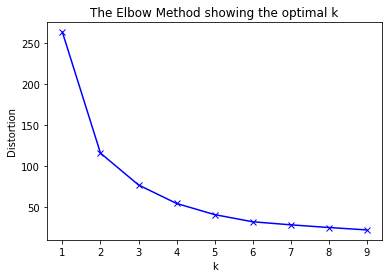

In [178]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(cluster_df)
    kmeanModel.fit(cluster_df)
    distortions.append(sum(np.min(cdist(cluster_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [179]:
#Use silhouette score
K = list (range(2,6))
for k in K:
    kmeans = KMeans(n_clusters=k)
    pred = kmeans.fit_predict(cluster_df)
    score = silhouette_score (cluster_df, pred, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 2, silhouette score is 0.6918335957831695)
For n_clusters = 3, silhouette score is 0.6795054945745601)
For n_clusters = 4, silhouette score is 0.682682997911776)
For n_clusters = 5, silhouette score is 0.6953483588639516)


In [180]:
n_clusters_ = 3
# Initializing KMeans
kmeans = KMeans(n_clusters=n_clusters_)
# Fitting with inputs
kmeans = kmeans.fit(cluster_df)
# Predicting the clusters
labels = kmeans.predict(cluster_df)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [181]:
index = 0
print("Number of clusters: ", n_clusters_)
print()
for cluster in C:
    index+=1
    print("Cluster #:",index)
    for col,record in zip(list(cluster_df),cluster):
        print(col,":",record)
    print("")
    print("====================")

Number of clusters:  3

Cluster #: 1
HS_CGPA : 3.413822497976801
EXT_SIZE : 33.35338548690774
Catholic : 0.19881305637982816
CPS_HS : 0.09468572970056582
IB_SelfSelect : 0.01996223361208556
YRGPA1 : 3.155530078230375
HRSYR1 : 46.9266253034799
retention_1 : 0.8535203668734822
graduate_6 : 0.6984084165093047
HS_Type_Public : 0.33099541408146127
white : 0.600485567844617

Cluster #: 2
HS_CGPA : 3.4383932853717027
EXT_SIZE : 785.5027977617933
Catholic : 1.4432899320127035e-15
CPS_HS : 0.14228617106314875
IB_SelfSelect : 0.016786570743405303
YRGPA1 : 3.178209432454037
HRSYR1 : 46.730615507593924
retention_1 : 0.876898481215028
graduate_6 : 0.7689848121502781
HS_Type_Public : 0.8888888888888838
white : 0.586730615507594

Cluster #: 3
HS_CGPA : 3.553135669362084
EXT_SIZE : 427.59164420485274
Catholic : 0.04672057502246224
CPS_HS : 0.11590296495956864
IB_SelfSelect : 0.040431266846361835
YRGPA1 : 3.1878167115902967
HRSYR1 : 46.69856244384546
retention_1 : 0.8553459119496856
graduate_6 : 0.7228